# Trabalho prático de dados, parte 2

Nesta etapa do trabalho prático, o grupo precisava aplicar algum algoritmo de aprendizagem
(regras de associação, regressão, aprendizado supervisionado ou aprendizado não-supervisionado)
para classificar ou agrupar os dados e, assim, tentar prever algum acontecimento desconhecido, com
foco em evasão, nota do ENEM e CRA.

## Imports básicos

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

ModuleNotFoundError: No module named 'sklearn'

## Lendo dataset

In [8]:
df = pd.read_csv("../Datasets/dadosFiltrados.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            74026 non-null  int64  
 1   Ano_Nascimento           73949 non-null  float64
 2   Sexo                     73986 non-null  object 
 3   Campus                   74026 non-null  object 
 4   Curso_Identificador      74026 non-null  int64  
 5   Curso                    74026 non-null  object 
 6   UF_Nascimento            73965 non-null  object 
 7   Municipio_Nascimento     74026 non-null  object 
 8   Admissao                 74026 non-null  object 
 9   Saida                    74026 non-null  object 
 10  Codigo_Situacao_Aluno    74026 non-null  object 
 11  Situacao_Aluno           74026 non-null  object 
 12  Situacao_Aluno_Agrupada  74026 non-null  object 
 13  Modalidade_Inscrita      68753 non-null  float64
 14  ENEM                  

### Selecionando atributos significativos

Vamos primeiramente realizar uma plotagem dos atributos do datasets para ver se conseguimos encontrar alguma correlação pelos gráficos. Para isso, foram selecionadas algumas colunas que possivelmente apresentarão resultados significativos

In [12]:
dfPlot = df[[
    "Ano_Nascimento" ,
    "Sexo" ,
    "Campus" ,
    "Curso_Identificador" ,
    "UF_Nascimento" ,
    "Codigo_Situacao_Aluno" ,
    "Modalidade_Inscrita" ,
    "ENEM" ,
    "Num_Reprovacoes" ,
    "Raca" ,
    "CRA" ,
    "Area" ,
    "Admissao_Ano",
    "Saida_Ano",
]]
# Colunas não usadas
# ["Identificador" , 
# "Curso" ,
# "UF_Nascimento" ,
# "Admissao" ,
# "Saida" ,
# "Situacao_Aluno" ,
# "Situacao_Aluno_Agrupada" ,
# "Admissao_Semestre",
# "Saida_Semestre"]

# Vamos converter os atributos desse dataset que são categoricos para variaveis discretas
colunas = dfPlot.select_dtypes(include=['object']).columns
for col in colunas:
    dfPlot[col] = dfPlot[col].astype('category')
for col in colunas:
    dfPlot[col] = dfPlot[col].cat.codes
dfPlot = dfPlot[dfPlot['Saida_Ano'] != 0]
dfPlot


C:\Users\guizo\AppData\Local\Temp\ipykernel_18508\1921285728.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPlot[col] = dfPlot[col].astype('category')
C:\Users\guizo\AppData\Local\Temp\ipykernel_18508\1921285728.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPlot[col] = dfPlot[col].astype('category')
C:\Users\guizo\AppData\Local\Temp\ipykernel_18508\1921285728.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Ano_Nascimento,Sexo,Campus,Curso_Identificador,UF_Nascimento,Codigo_Situacao_Aluno,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA,Area,Admissao_Ano,Saida_Ano
0,1982.0,1,1,1101,18,0,0.0,NaN,0,3,0.0,6,2000,2000
1,1982.0,1,1,1101,6,0,0.0,NaN,3,3,71.2,6,2000,2002
2,1979.0,0,1,1101,10,2,0.0,NaN,3,3,78.5,6,2000,2005
3,1979.0,0,1,1101,10,2,0.0,NaN,20,4,56.0,6,2000,2006
4,1980.0,0,1,1101,25,2,0.0,NaN,1,3,76.9,6,2000,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73993,2002.0,0,0,2145,7,0,9.0,602.38,5,1,4.4,4,2022,2022
73994,2002.0,1,2,3101,25,0,9.0,495.44,5,0,21.2,6,2022,2022
73999,2004.0,1,2,3102,10,0,3.0,552.52,0,1,74.2,6,2022,2022
74002,NaN,1,2,3109,10,0,9.0,550.22,5,1,2.6,3,2022,2022


<Figure size 1700x1700 with 0 Axes>

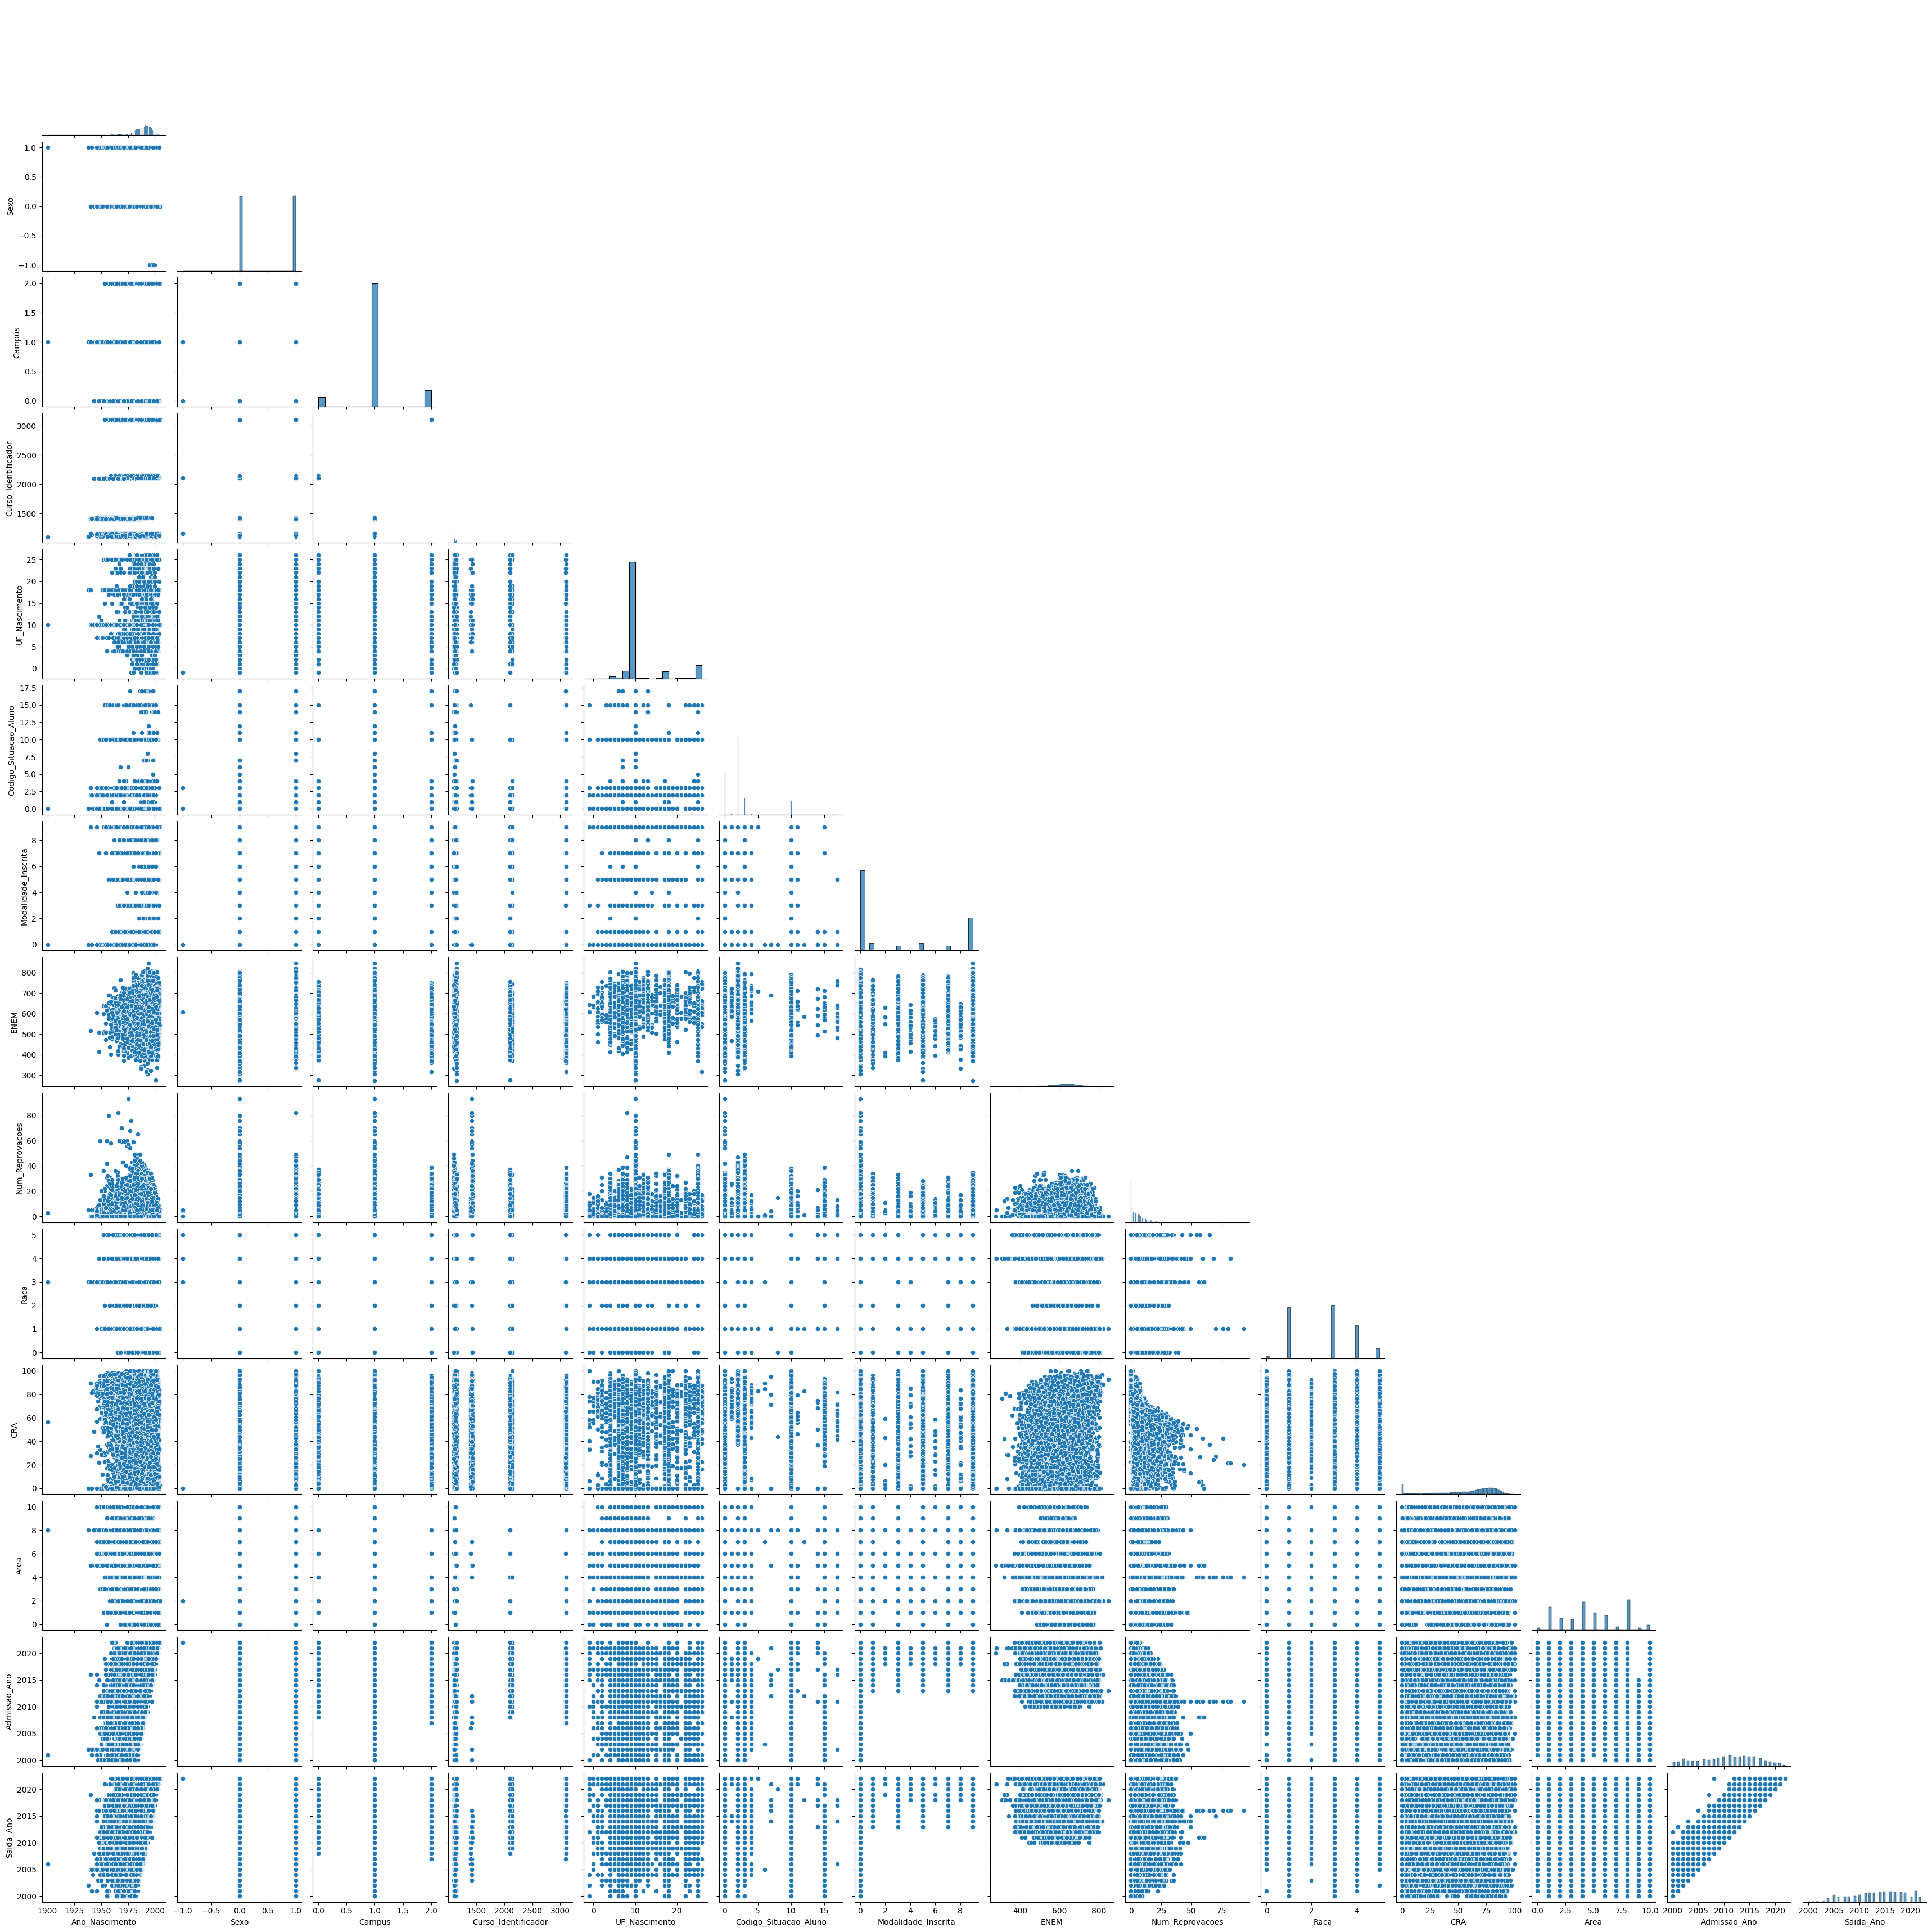

In [13]:
plt.figure(figsize=(17, 17))
sns.pairplot(dfPlot, corner=True)
plt.savefig('Imagens/pairplot.png', format='png', dpi=300)

Para uma visualização mais detalhada, é recomendável abrir a imagem separadamente em [Imagens/pairplot.png](Imagens/pairplot.png)

In [11]:
# ["Identificador" , 
# "Ano_Nascimento" ,
# "Sexo" ,
# "Campus" ,
# "Curso_Identificador" ,
# "Curso" ,
# "UF_Nascimento" ,
# "Municipio_Nascimento" ,
# "Admissao" ,
# "Saida" ,
# "Codigo_Situacao_Aluno" ,
# "Situacao_Aluno" ,
# "Situacao_Aluno_Agrupada" ,
# "Modalidade_Inscrita" ,
# "ENEM" ,
# "Num_Reprovacoes" ,
# "Raca" ,
# "CRA" ,
# "Area" ,
# "Admissao_Ano",
# "Admissao_Semestre",
# "Saida_Ano",
# "Saida_Semestre"]

analises possiveis:
mulheres reprovam menos
reprovação por campus
enem vs reprovçoes
cra reprovaçoes